*__Principal Component Analysis(PCA)__*

In [1]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

In [2]:
from common import *
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

In [3]:
np.random.seed(0)

In [4]:
import warnings; warnings.simplefilter('ignore')

In [5]:
# Dataset Phone Price
x_train, x_test, y_train, y_test = read_dataset(path_to_file="../Data/dataset2/train.csv")

In [6]:
y_test[y_test<=1] = 0
y_test[y_test>=2] = 1
y_train[y_train<=1] = 0
y_train[y_train>=2] = 1

In [7]:
# preventing information about the distribution of the test set leaking into your model
standard_scaler = MinMaxScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.fit_transform(x_test)
# y_train_scaled = standard_scaler.fit_transform(y_train).astype('int')
# y_test_scaled = standard_scaler.fit_transform(y_test).astype('int')

In [8]:
for i in range(2, 20):
    pca = PCA(n_components=i, random_state=0)
    pca.fit_transform(x_train.values)
    x_new = pca.fit_transform(x_train.values)
    print(f"Dimension={i}, Sum: {sum(pca.explained_variance_ratio_)}")

Dimension=2, Sum: 0.8310959629212444
Dimension=3, Sum: 0.9427532506924291
Dimension=4, Sum: 0.9990407046788937
Dimension=5, Sum: 0.9997393343192365
Dimension=6, Sum: 0.9999261258195924
Dimension=7, Sum: 0.999953129007327
Dimension=8, Sum: 0.9999700353044472
Dimension=9, Sum: 0.9999857471493718
Dimension=10, Sum: 0.9999909694790575
Dimension=11, Sum: 0.9999957744702452
Dimension=12, Sum: 0.9999987505905236
Dimension=13, Sum: 0.9999991359260899
Dimension=14, Sum: 0.9999993341774311
Dimension=15, Sum: 0.9999994857604236
Dimension=16, Sum: 0.9999996323655169
Dimension=17, Sum: 0.9999997713664832
Dimension=18, Sum: 0.9999999024769418
Dimension=19, Sum: 0.9999999525290876


In [9]:
# After chosing the best component
best_component = 5
pca = PCA(n_components=best_component, random_state=0)
pca_result = pca.fit_transform(x_train)
for i in range(0, best_component):
    x_train[f"pca-{i}"] = pca_result[:, i]
    
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,pca-0,pca-1,pca-2,pca-3,pca-4
1520,1883,0,1.6,0,9,0,24,0.1,87,1,...,10,3,0,0,0,1450.333663,-532.318228,665.971988,82.692024,-51.898483
64,702,0,2.6,1,2,1,9,0.7,141,3,...,4,19,1,0,0,836.977641,90.013009,-546.824082,305.487377,2.372680
1431,1283,1,0.7,1,0,1,27,0.2,80,4,...,15,6,1,0,0,1835.540680,815.454050,7.625746,122.921208,-60.473919
926,1496,1,1.9,1,13,0,38,0.1,126,4,...,4,6,0,0,1,-187.107816,-634.343202,298.775314,-423.108584,-12.443637
983,1175,1,1.3,0,2,0,19,0.3,164,7,...,4,9,1,1,0,-174.866548,241.514038,-68.159449,-64.728021,25.102135


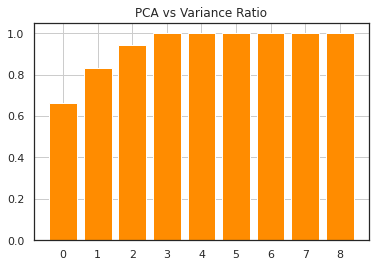

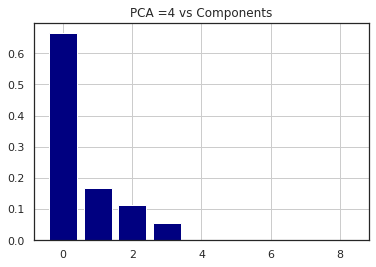

In [45]:
sums_pca = []
for i in range(1, 10):
    pca = PCA(n_components=i, random_state=0)
    pca.fit_transform(x_train)
    sums_pca.append(sum(pca.explained_variance_ratio_))

pca2 = PCA(n_components=4, random_state=0)
pca2.fit_transform(x_train)

plt.figure()
plt.title(f"PCA vs Variance Ratio")
plt.bar(range(len(sums_pca)), sums_pca , color="darkorange")
plt.xticks(range(len(sums_pca)))
plt.grid()
plt.show()

plt.figure()
plt.title(f"PCA =4 vs Components")
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, color='navy')
plt.grid()
plt.show()

In [11]:
# Iterate over components and see which one results in least KMeans error
pca_score = []
for i in range(1, 20):
    pca = PCA(n_components=i, random_state=0)
    xtr = pca.fit_transform(x_train_scaled)  
    kmm = KMeans(n_clusters=2, max_iter=100, random_state=0, n_jobs=-1).fit(xtr)
    print(accuracy_score(kmm.labels_, y_train))
    pca_score.append(accuracy_score(kmm.labels_, y_train))
# Same - even here the minimum number of components  = 4 

0.4856060606060606
0.5143939393939394
0.4856060606060606
0.4856060606060606
0.5143939393939394
0.4856060606060606
0.4856060606060606
0.4856060606060606
0.4856060606060606
0.4856060606060606
0.4856060606060606
0.4856060606060606
0.4856060606060606
0.4856060606060606
0.4856060606060606
0.4856060606060606
0.4856060606060606
0.4856060606060606
0.4856060606060606


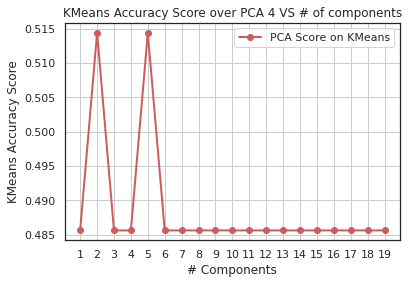

In [43]:
plt.figure()
plt.title("KMeans Accuracy Score over PCA 4 VS # of components")
plt.plot(range(1, 20), pca_score, 'o-', lw=2, color='indianred', label="PCA Score on KMeans")
plt.xlabel("# Components")
plt.ylabel("KMeans Accuracy Score")
plt.legend()

plt.xticks(range(1, 20))
plt.grid()

In [13]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,pca-0,pca-1,pca-2,pca-3,pca-4
1520,1883,0,1.6,0,9,0,24,0.1,87,1,...,10,3,0,0,0,1450.333663,-532.318228,665.971988,82.692024,-51.898483
64,702,0,2.6,1,2,1,9,0.7,141,3,...,4,19,1,0,0,836.977641,90.013009,-546.824082,305.487377,2.372680
1431,1283,1,0.7,1,0,1,27,0.2,80,4,...,15,6,1,0,0,1835.540680,815.454050,7.625746,122.921208,-60.473919
926,1496,1,1.9,1,13,0,38,0.1,126,4,...,4,6,0,0,1,-187.107816,-634.343202,298.775314,-423.108584,-12.443637
983,1175,1,1.3,0,2,0,19,0.3,164,7,...,4,9,1,1,0,-174.866548,241.514038,-68.159449,-64.728021,25.102135


<AxesSubplot:xlabel='pca-0', ylabel='pca-1'>

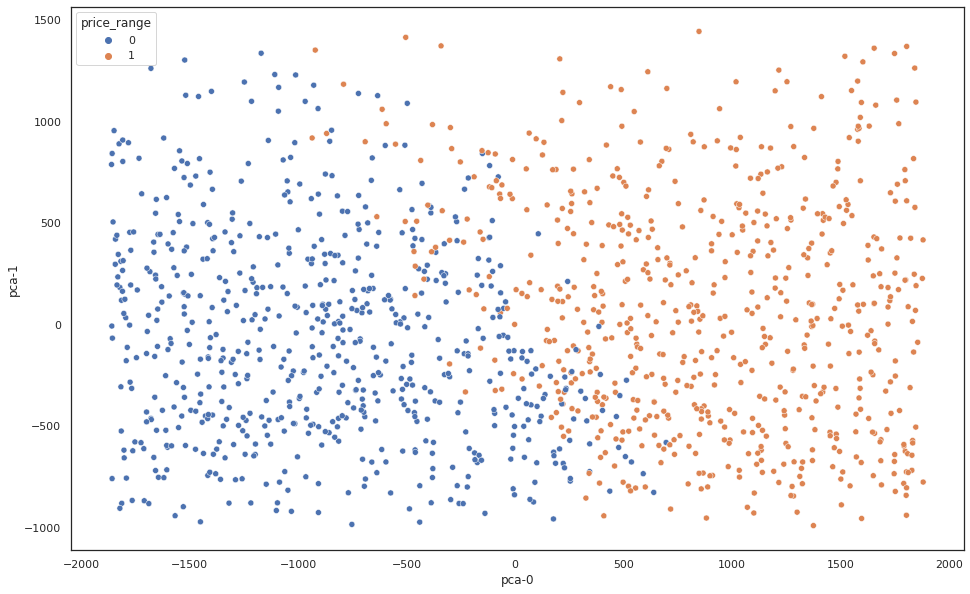

In [44]:
# After chosing the best component
x_train['price_range'] = y_train['price_range']
plt.figure(figsize=(16,10))
sns.set_theme(style="white")
sns.scatterplot(
    x="pca-0", y="pca-1",
    hue="price_range",
    data=x_train,
    legend="full",
    alpha=1
)

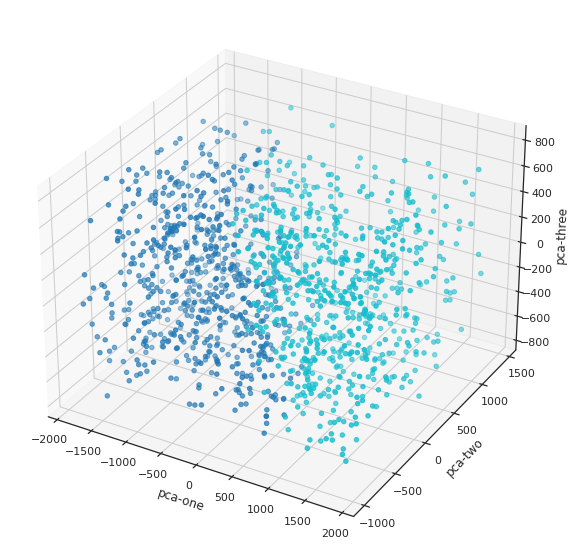

In [15]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=x_train["pca-0"], 
    ys=x_train["pca-1"], 
    zs=x_train["pca-2"], 
    c=x_train["price_range"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [18]:
s = {}
h = {}
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, n_init=50, max_iter=1000, random_state=0, n_jobs=-1).fit(pca_result)
    label = kmeans.labels_
    s[i] = silhouette_score(pca_result, label, metric='euclidean')
    h[i] = homogeneity_score(y_train['price_range'].values, label)

In [19]:
sdf = pd.DataFrame(list(s.values()), columns=['Silhouette'])
sdf['Homogeneity'] = pd.DataFrame(list(h.values()))

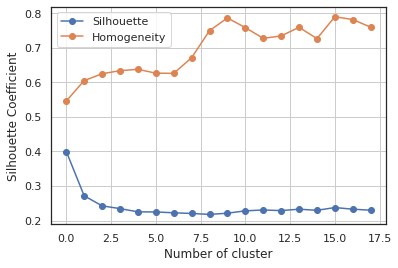

In [20]:
plt.figure()
plt.plot(sdf, 'o-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.legend(sdf.columns)
plt.show()

In [21]:
# NN on PCA

In [23]:
nn = MLPClassifier()
nn.fit(pca_result, y_train)

MLPClassifier()

In [29]:
y_pred = nn.predict(pca_result)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)
print(classification_report(y_train, y_pred))
print("2 Clusters - 4 best components from PCA")

0.9992424242424243
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       660
           1       1.00      1.00      1.00       660

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320

2 Clusters - 4 best components from PCA
